In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
tweets = pd.read_csv('./../train.csv')
tweets = tweets.drop(columns=['id'])
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(1), object(3)
memory usage: 238.0+ KB


In [8]:
tweets['length'] = tweets['text'].map(lambda x: len(x))
tweets['length'].describe()
tweets.head()

,keyword,location,text,target,length
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [9]:
tweets.head()

,keyword,location,text,target,length
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


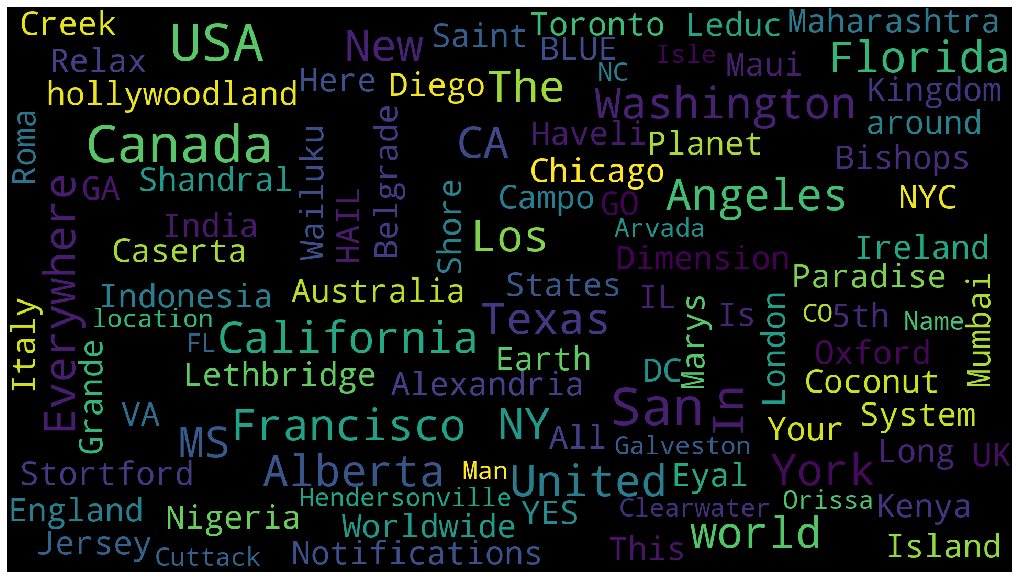

In [10]:
wordcloud = WordCloud(
    max_words=100,
    min_font_size=10,
    max_font_size=100, 
    random_state=42,
    width=1920, 
    height=1080,
    contour_width=8,
    contour_color='#FF8582'
    ).generate(str(tweets['location'].value_counts()))
fig = plt.figure(1)
plt.imshow(wordcloud)
fig.set_size_inches(18,20)
plt.axis("off")
plt.show()

In [12]:
fake_tweets = tweets.loc[tweets['target'] == 0]
legit_tweets = tweets.loc[tweets['target'] == 1]

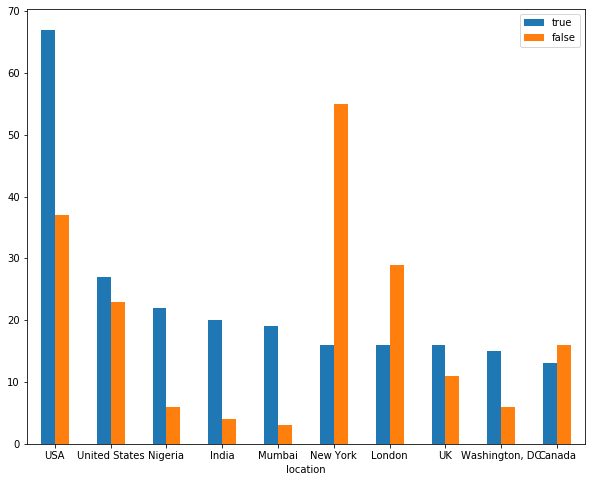

In [15]:
legit_location = legit_tweets.location.value_counts(sort=True).reset_index().rename(columns={'index': 'location', 'location': 'true'}).set_index('location')
fake_location = fake_tweets.location.value_counts(sort=True).reset_index().rename(columns={'index': 'location', 'location': 'false'}).set_index('location')
legit_location.join(fake_location).sort_values(by=['true', 'false'], ascending=False).head(10).plot(kind='bar', figsize=(10,8), rot=0)